In [1]:

import importlib
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from copy import deepcopy
from decimal import Decimal, getcontext, DecimalException
import math
from scipy.optimize import curve_fit
import sympy as sp
from matplotlib.font_manager import FontProperties
import quantum_dl_lib
# importlib.reload(quantum_dl_lib)
# from quantum_dl_lib import *
# from improved_robustness import binary_search_intersection, quantum_advantage_size_by_year, find_largest_problem_size



In [94]:
# from decimal import Decimal, getcontext, DecimalException
# import math

# # Add a global debug flag or pass it as a parameter
# DEBUG_BINARY_SEARCH = False 
# DEBUG_TARGET_YEAR_FOR_QAS = None # Set this to the year where QAS fails for detailed n-search logs
# DEBUG_TARGET_CLASSICAL_RT = None
# DEBUG_TARGET_QUANTUM_RT = None


# def binary_search_intersection(
#     func1, func2, low, high, tolerance=1e-9, max_iterations=100000,
#     # Add context for debugging
#     search_variable_name="x", # "x", "n", or "year"
#     current_context_info="" # e.g. "for QAS at year 2040" or "for OuterSearch"
# ) -> float:
    
#     global DEBUG_BINARY_SEARCH
#     is_debug_call = DEBUG_BINARY_SEARCH # Check if we should debug this specific call

#     if is_debug_call:
#         print(f"\nDEBUG_BSI ({current_context_info}, searching for {search_variable_name}): Interval [{low}, {high}], Tol: {tolerance}")

#     try:
#         getcontext().prec = 100 # High precision for interval arithmetic
#         low_dec = Decimal(str(low))
#         high_dec = Decimal(str(high))
#         tol_dec = Decimal(str(tolerance))

#         iteration_count = 0

#         def safe_f(x_dec: Decimal, iter_num_for_debug: int) -> float | None: # Allow None return
#             x = float(x_dec)
#             v1, v2 = None, None
#             log_v1, log_v2 = None, None # For debug
#             eval_method = "direct"

#             try:
#                 v1 = func1(x)
#             except Exception as e: # Catch more broadly for debugging
#                 if is_debug_call: print(f"  DEBUG_BSI_safe_f ({current_context_info}, iter {iter_num_for_debug}): func1({x}) EXCEPTION: {e}")
#                 v1 = float("inf") # Default to inf on error for now
            
#             try:
#                 v2 = func2(x)
#             except Exception as e:
#                 if is_debug_call: print(f"  DEBUG_BSI_safe_f ({current_context_info}, iter {iter_num_for_debug}): func2({x}) EXCEPTION: {e}")
#                 v2 = float("inf")

#             if is_debug_call:
#                  original_v1_str = f"{v1:.4e}" if isinstance(v1, (float, int)) and not math.isinf(v1) and not math.isnan(v1) else str(v1)
#                  original_v2_str = f"{v2:.4e}" if isinstance(v2, (float, int)) and not math.isinf(v2) and not math.isnan(v2) else str(v2)
#                  print(f"  DEBUG_BSI_safe_f ({current_context_info}, iter {iter_num_for_debug}): x={x:.4e}, v1_orig={original_v1_str}, v2_orig={original_v2_str}")

#             if v1 is None or v2 is None:
#                 if is_debug_call: print(f"  DEBUG_BSI_safe_f ({current_context_info}, iter {iter_num_for_debug}): v1 or v2 is None. Returning None.")
#                 return None 

#             # Handle infinities and large numbers more carefully
#             v1_is_inf = math.isinf(v1) if isinstance(v1, float) else False
#             v2_is_inf = math.isinf(v2) if isinstance(v2, float) else False

#             if v1_is_inf and v2_is_inf and v1 > 0 and v2 > 0 : # Both positive infinity
#                 eval_method = "log_vs_log"
#                 try: log_v1 = math.log(func1(x)) # Re-evaluate for log, assuming it's safe if it was inf
#                 except Exception: log_v1 = float("inf") # if log fails
#                 try: log_v2 = math.log(func2(x))
#                 except Exception: log_v2 = float("inf")
                
#                 if is_debug_call: print(f"    log_v1={log_v1:.4e}, log_v2={log_v2:.4e}")
#                 if math.isinf(log_v1) and math.isinf(log_v2) and log_v1 == log_v2 : return 0.0 # Both log inf, treat as equal
#                 return log_v1 - log_v2
#             elif v1_is_inf and v1 > 0: # v1 is +inf, v2 is not (or is -inf)
#                 eval_method = "v1_pos_inf"
#                 return float("inf")
#             elif v2_is_inf and v2 > 0: # v2 is +inf, v1 is not (or is -inf)
#                 eval_method = "v2_pos_inf"
#                 return -float("inf")
#             elif v1_is_inf and v1 < 0: # v1 is -inf
#                 eval_method = "v1_neg_inf"
#                 return -float("inf")
#             elif v2_is_inf and v2 < 0: # v2 is -inf
#                 eval_method = "v2_neg_inf"
#                 return float("inf")
            
#             # Standard case: no infinities or handled by specific infinity logic above
#             if isinstance(v1, (int, float)) and isinstance(v2, (int, float)):
#                 diff = v1 - v2
#                 if is_debug_call: print(f"    v1={v1:.4e}, v2={v2:.4e}, diff={diff:.4e} (method: {eval_method})")
#                 return diff
#             else: # Should not happen if v1/v2 are not None and not inf
#                 if is_debug_call: print(f"  DEBUG_BSI_safe_f ({current_context_info}, iter {iter_num_for_debug}): Unexpected types for v1/v2. v1 type: {type(v1)}, v2 type: {type(v2)}. Returning None.")
#                 return None


#         f_low = safe_f(low_dec, -1) # Iteration -1 for low
#         f_high = safe_f(high_dec, -2) # Iteration -2 for high

#         if f_low is None or f_high is None:
#             if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}): f_low or f_high is None. f_low={f_low}, f_high={f_high}. Returning None.")
#             return None

#         if (f_low == float("inf") and f_high == float("inf")) or \
#            (f_low == -float("inf") and f_high == -float("inf")):
#              if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}): f_low and f_high are same-signed infinities. No sign change guaranteed. f_low={f_low}, f_high={f_high}. Returning None.")
#              return None # Avoid inf * inf > 0 issue if signs are same

#         if f_low * f_high > 0:
#             if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}): No sign change in f(x) over interval. f_low={f_low:.4e}, f_high={f_high:.4e}. Returning None.")
#             return None

#         for i in range(max_iterations):
#             iteration_count = i
#             mid_dec = (low_dec + high_dec) / 2
#             if mid_dec == low_dec or mid_dec == high_dec: # Interval collapsed due to Decimal precision
#                 if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}, iter {i}): Interval collapsed (mid == low or mid == high). Returning float(mid_dec).")
#                 return float(mid_dec)

#             f_mid = safe_f(mid_dec, i)

#             if f_mid is None:
#                 if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}, iter {i}): f_mid is None at mid={float(mid_dec):.4e}. Returning None.")
#                 return None
            
#             if abs(f_mid) < float(tol_dec): # Compare with float representation of tolerance
#                 if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}, iter {i}): Found intersection at {search_variable_name}={float(mid_dec):.4e}, f_mid={f_mid:.4e}.")
#                 return float(mid_dec)

#             if f_low * f_mid < 0: # Root in [low, mid]
#                 high_dec = mid_dec
#                 # f_high = f_mid # Only update f_high if it's a valid number, not inf from previous f_mid
#             else: # Root in [mid, high]
#                 low_dec = mid_dec
#                 f_low = f_mid # Update f_low because f_mid was not inf in this branch

#             if abs(high_dec - low_dec) < tol_dec: # Interval small enough
#                 if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}, iter {i}): Interval sufficiently small. Returning {search_variable_name}={float(mid_dec):.4e}.")
#                 return float(mid_dec)
        
#         if is_debug_call: print(f"  DEBUG_BSI ({current_context_info}): Max iterations ({max_iterations}) reached. Last mid={float(mid_dec):.4e}, f_mid={f_mid:.4e}. Returning None.")
#         return None
        
#     except Exception as e:
#         if is_debug_call or DEBUG_BINARY_SEARCH: # Print if any debug is on
#             print(f"  DEBUG_BSI ({current_context_info}): UNEXPECTED EXCEPTION in binary_search_intersection: {e}. Iterations: {iteration_count}. Low={low}, High={high}. Returning None.")
#         return None


In [143]:
# MAX_PROBLEM_SIZE = 1e50
# MIN_YEAR = 2025
# MAX_YEAR = 2050


# def binary_search_intersection(
#     func1, func2, low, high, tolerance=1e-15, max_iterations=1000000
# ) -> float:
#     """
#     Find the intersection of two functions f1(x)=func1(x) and f2(x)=func2(x) (i.e. where f1(x)==f2(x))
#     using a robust binary search approach that can handle enormous numbers.

#     This version avoids evaluating huge numbers directly by using a "safe" evaluation routine.
#     It assumes that on the search interval the functions are positive (so logarithms make sense)
#     and that the difference f(x)=func1(x)-func2(x) is monotonic.

#     Args:
#         func1, func2: The two functions.
#         low, high: The endpoints of the search interval.
#         tolerance: The acceptable error for f(x) (or its logarithmic version).
#         max_iterations: Maximum iterations to try.

#     Returns:
#         The x-value where the functions intersect, or None if no intersection was found.
#     """
#     try:
#         # Use high precision for interval arithmetic.
#         getcontext().prec = 100
#         low = Decimal(str(low))
#         high = Decimal(str(high))
#         tol = Decimal(str(tolerance))

#         def safe_f(x_dec: Decimal) -> float:
#             """
#             Evaluate f(x)=func1(x)-func2(x) in a way that avoids overflow.
#             """
#             x = float(x_dec)
#             try:
#                 v1 = func1(x)
#             except (OverflowError, ValueError, TypeError, ZeroDivisionError) as e:
#                 print(f"Error evaluating func1({x}): {e}")
#                 v1 = float("inf")
#             try:
#                 v2 = func2(x)
#             except (OverflowError, ValueError, TypeError, ZeroDivisionError) as e:
#                 print(f"Error evaluating func2({x}): {e}")
#                 v2 = float("inf")

#             # Check if either value is None and handle it
#             if v1 is None or v2 is None:
#                 return None  # Return None to indicate no valid comparison

#             # If either function evaluates to infinity (or a value that compares as such), we replace it.
#             if math.isinf(v1) or math.isinf(v2):
#                 # If both are infinite and positive, try to compare their logarithms.
#                 if v1 > 0 and v2 > 0 and math.isinf(v1) and math.isinf(v2):
#                     try:
#                         log_v1 = math.log(func1(x))
#                     except (OverflowError, ValueError, TypeError, ZeroDivisionError):
#                         log_v1 = float("inf")
#                     try:
#                         log_v2 = math.log(func2(x))
#                     except (OverflowError, ValueError, TypeError, ZeroDivisionError):
#                         log_v2 = float("inf")
#                     return log_v1 - log_v2
#                 # Otherwise, if only one is infinite, the difference will have the sign of the finite number.
#                 # (If v1 is infinite and v2 is not, f(x) is positive; if v2 is infinite, f(x) is negative.)
#                 if math.isinf(v1) and not math.isinf(v2):
#                     return float("inf")
#                 if math.isinf(v2) and not math.isinf(v1):
#                     return -float("inf")
#             return v1 - v2

#         # Evaluate at the endpoints.
#         try:
#             f_low = safe_f(low)
#             f_high = safe_f(high)
#         except (OverflowError, ValueError, DecimalException, TypeError, ZeroDivisionError) as e:
#             print("Error evaluating function at endpoints:", e)
#             return None

#         # Check if either value is None
#         if f_low is None or f_high is None:
#             print("Function evaluation returned None at endpoints")
#             return None

#         # Check that f(low) and f(high) bracket a sign change.
#         if f_low * f_high > 0:
#             print("No sign change in f(x) over the interval; intersection not guaranteed.")
#             return None

#         for i in range(max_iterations):
#             mid = (low + high) / 2
#             try:
#                 f_mid = safe_f(mid)
                
#                 # Handle case where f_mid is None
#                 if f_mid is None:
#                     print(f"Function evaluation returned None at x={mid}")
#                     return None
                
#                 # If we are close enough, return.
#                 if abs(f_mid) < float(tol):
#                     return float(mid)

#                 # Decide which side of the interval contains the sign change.
#                 if f_low * f_mid < 0:
#                     high = mid
#                     f_high = f_mid
#                 else:
#                     low = mid
#                     f_low = f_mid

#                 # If the interval has shrunk sufficiently, exit.
#                 if abs(high - low) < tol:
#                     return float(mid)
                
#             except (OverflowError, ValueError, DecimalException, TypeError, ZeroDivisionError) as e:
#                 print(f"Error during binary search at iteration {i}, x={mid}: {e}")
#                 return None

#         print(f"No intersection found within {max_iterations} iterations")
#         return None
        
#     except Exception as e:
#         print(f"Unexpected error in binary_search_intersection: {e}")
#         return None



In [144]:
from decimal import Decimal, getcontext, DecimalException
import math


class BinarySearchIntersectionError(Exception):
    """Custom exception for binary search intersection errors."""
    pass

def binary_search_intersection(func1, func2, low, high=MAX_PROBLEM_SIZE, tolerance=1e-15, max_iterations=1000000) -> float:
    """
    Robust binary search to find intersection point of func1 and func2 with detailed error reporting.
    """

    getcontext().prec = 100
    low = Decimal(str(low))
    high = Decimal(str(high))
    tol = Decimal(str(tolerance))

    def safe_f(x_dec: Decimal) -> float:
        x = float(x_dec)
        try:
            v1 = func1(x)
        except Exception as e:
            raise BinarySearchIntersectionError(f"Error evaluating func1 at x={x}: {e}")
        try:
            v2 = func2(x)
        except Exception as e:
            raise BinarySearchIntersectionError(f"Error evaluating func2 at x={x}: {e}")

        if v1 is None or v2 is None:
            raise BinarySearchIntersectionError(f"Function returned None at x={x} (func1={v1}, func2={v2})")

        try:
            if math.isinf(v1) and math.isinf(v2):
                log_v1 = math.log(func1(x))
                log_v2 = math.log(func2(x))
                return log_v1 - log_v2
            elif math.isinf(v1):
                return float("inf")
            elif math.isinf(v2):
                return -float("inf")
        except Exception as e:
            raise BinarySearchIntersectionError(f"Error comparing infinities at x={x}: {e}")

        return v1 - v2

    try:
        f_low = safe_f(low)
        f_high = safe_f(high)
    except BinarySearchIntersectionError as e:
        print(f"Endpoint evaluation error: {e}")
        return None

    if f_low * f_high > 0:
        print(f"No sign change in f(x) over the interval [{low}, {high}] (f_low={f_low}, f_high={f_high}); intersection not guaranteed.")
        return None

    for i in range(max_iterations):
        mid = (low + high) / 2
        try:
            f_mid = safe_f(mid)

            if abs(f_mid) < float(tol):
                return float(mid)

            if f_low * f_mid < 0:
                high = mid
                f_high = f_mid
            else:
                low = mid
                f_low = f_mid

            if abs(high - low) < tol:
                return float(mid)

        except BinarySearchIntersectionError as e:
            print(f"Iteration {i} error at x={mid}: {e}")
            return None

    print(f"No intersection found within {max_iterations} iterations (last interval: [{low}, {high}]).")
    return None


In [145]:

# #constants in different format
fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPUs
# time_upper_limt = 3.14*1e7 # 1-year of seconds
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no asymptotic connectivity penality
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0



# default quantum and classical runtime if not specified
classical_runtime = "n**3"
quantum_runtime = "n"

IBM_ROADMAP = {
    2020: 27,
    2022: 127,
    2024: 133,
}
GOOGLE_ROADMAP = {
    2019: 53,
    2024: 105,
}
PERCENTILE_95_ROADMAP = {
    2025: 1662,
    2030: 15660,
}
SOTA_ROADMAP = {
    2025: 1959,
    2030: 24352,
}
percentile_90_roadmap = {2025: 305.13, 2030: 1315}

default_roadmap = percentile_90_roadmap


# gives the physical to logical overhead based on the surface code formula
def surface_code_formula(pP: float) -> float:
    try:
        pL = 1e-18
        pth = 1e-2
        numerator = 4 * math.log(math.sqrt(10 * pP / pL))
        denominator = math.log(pth / pP)
        fraction = numerator / denominator
        f_QEC = (fraction + 1) ** -2
        return f_QEC**-1
    except (ValueError, ZeroDivisionError, OverflowError) as e:
        # print(f"Error in surface_code_formula with pP={pP}: {e}")
        return float('inf')  # Return infinity for invalid inputs


def problem_size_qubit_feasible(
     year: int, q_prob_size="log"
) -> float:
    roadmap = default_roadmap
    try:
        # Check if roadmap is valid
        if not roadmap or not isinstance(roadmap, dict):
            # print("Invalid roadmap provided")
            return None

        # fit exponential to roadmap
        years = np.array(list(roadmap.keys()))
        qubits = np.array(list(roadmap.values()))
        
        if len(years) < 2 or len(qubits) < 2:
            # print("Roadmap needs at least two data points")
            return None
            
        min_year = min(years)
        # initial guess
        p0 = [min(qubits), 0.5, 0]

        # fit an exponential curve to the data
        def exp_func(x, a, b, c):
            return a * np.exp(b * (x - min_year)) + c

        try:
            popt, _ = curve_fit(
                exp_func, years, qubits, p0=p0, bounds=([0, -2, -1000], [10000, 2, 1000])
            )
        except (RuntimeError, ValueError, TypeError) as e:
            # print(f"Fitting failed: {e}")
            return None
            
        try:
            surf_overhead = surface_code_formula(
                initial_error * (1-fidelity_improvement_rate) ** (year - 2025)
            )
            
            if surf_overhead <= 0 or math.isinf(surf_overhead):
                # print(f"Invalid surface code overhead: {surf_overhead}")
                return None
                
            if q_prob_size == "log":
                qubit_number = min(
                    exp_func(year, *popt) / (surf_overhead * alg_overhead_qubit),
                    np.log2(MAX_PROBLEM_SIZE),
                )
                if qubit_number <= 0:
                    # print(f"Invalid qubit number: {qubit_number}")
                    return None
                return 2 ** (qubit_number)
            else:
                return min(
                    exp_func(year, *popt) / (surf_overhead * alg_overhead_qubit),
                    MAX_PROBLEM_SIZE,
                )
        except (ValueError, OverflowError, ZeroDivisionError) as e:
            # print(f"Error calculating problem size: {e}")
            return None
            
    except Exception as e:
        # print(f"Unexpected error in problem_size_qubit_feasible: {e}")
        return None


# quantum speed per operation function
def quantum_seconds_per_operation(year):
    try:
        gate_speed = superconducting_gate_speed_init * (
            1 - gate_speed_improvement_rate
        ) ** (year - 2025)
        
        # with error correction
        fidelity_year = initial_error * (1-fidelity_improvement_rate) ** (year - 2025)
        
        if fidelity_year <= 0:
            # print(f"Invalid fidelity for year {year}: {fidelity_year}")
            return float('inf')
            
        current_overhead = surface_code_formula(fidelity_year)
        initial_overhead = surface_code_formula(initial_error)
        
        if math.isinf(current_overhead) or math.isinf(initial_overhead) or initial_overhead == 0:
            # print(f"Invalid surface code overhead calculation for year {year}")
            return float('inf')
            
        proportional_change = current_overhead / initial_overhead
        
        return gate_speed * scode_init_speed_overhead * proportional_change ** (1.5)
        
    except (ValueError, ZeroDivisionError, OverflowError) as e:
        # print(f"Error in quantum_seconds_per_operation for year {year}: {e}")
        return float('inf')


# seconds per effective operation ie here we factor in parallelism
def classical_seconds_per_operation(year):
    try:
        # just dividing by number of processors here for now to simplify things
        return (
            classical_speed_init
            * (1 - classical_speed_improvement_rate) ** (year - 2025)
            / number_of_processors
        )
    except (ValueError, ZeroDivisionError, OverflowError) as e:
        # print(f"Error in classical_seconds_per_operation for year {year}: {e}")
        return float('inf')


# maximum problem size that can be solved on a quantum computer in a given amount of time at a given year
def find_largest_problem_size(
    runtime_string,
    year: int,
    quantum=True,
    qadv_only=False,
    stagnation_year=2200,
    q_prob_size="log",
) -> float:
    
    # Constants
    try:
        # Convert string expression to lambda function
        n = sp.Symbol("n")
        expr = sp.sympify(runtime_string)
        expr = expr * n**connectivity_penalty_exponent * alg_overhead_qspeed
        # Apply connectivity penalty to the runtime
        runtime_func = sp.lambdify(n, expr)

        if quantum:
            quantum_total = lambda size: quantum_seconds_per_operation(
                year
            ) * runtime_func(size)

            def quantum_limit(x):
                return time_upper_limit  # number of seconds in a year
                # return q_ops_second_dollar

            qadv = binary_search_intersection(
                quantum_total, quantum_limit, low=2.5, high=MAX_PROBLEM_SIZE
            )
            if qadv is None:
                # print(f"No intersection found between quantum total and limit for year {year}")
                qadv = float("inf")
            # except Exception as e:
            #     print(f"Error finding intersection for year {year}: {e}")
            #     return float("inf")

            size_feasible = problem_size_qubit_feasible(year=year, q_prob_size=q_prob_size)
            # Handle the case where size_feasible is None
            if size_feasible is None:
                # print(f"No feasible size found for year {year}. Returning infinity.")
                return float("inf")  # Return infinity if no feasible size is found
            if not qadv_only:
                return min(MAX_PROBLEM_SIZE, min(qadv, size_feasible))
            else:
                return min(MAX_PROBLEM_SIZE, qadv)

        else:
            #classical max problem size 
            def classical_cost(x):
                try:
                    if year < stagnation_year:
                        return classical_seconds_per_operation(year) * runtime_func(x)
                    else:
                        return classical_seconds_per_operation(
                            stagnation_year
                        ) * runtime_func(x)
                except (ValueError, TypeError, ZeroDivisionError, OverflowError) as e:
                    # print(f"Error in classical_cost for x={x}: {e}")
                    return float('inf')

            def classical_limit(x):
                return time_upper_limit
                # return ops_second_dollar

            return binary_search_intersection(
                classical_cost, classical_limit, low=2.5, high=1e50
            )

    except Exception as e:
        # print(f"Error in find_largest_problem_size: {e}")
        return None


def quantum_advantage_size_by_year(
    year, classical_runtime_string: str, quantum_runtime_string: str
) -> float:
    try:
        n = sp.symbols("n")
        
        # Parse and create classical runtime function
        try:
            class_expr = sp.sympify(classical_runtime_string)
            class_expr = (
                class_expr * classical_seconds_per_operation(year) * classical_alg_overhead
            )
            classical_runtime_func = sp.lambdify(n, class_expr)
        except (sp.SympifyError, TypeError, ValueError) as e:
            # print(f"Error creating classical runtime function: {e}")
            return None
            
        # Parse and create quantum runtime function
        try:
            quant_expr = sp.sympify(quantum_runtime_string)
            quant_expr = quant_expr * n**connectivity_penalty_exponent * alg_overhead_qspeed
            quant_expr = quant_expr * quantum_seconds_per_operation(year)
            quantum_runtime_func = sp.lambdify(n, quant_expr)
        except (sp.SympifyError, TypeError, ValueError) as e:
            # print(f"Error creating quantum runtime function: {e}")
            return None

        # Find intersection using the original string expressions
        intersection = binary_search_intersection(
            classical_runtime_func, quantum_runtime_func, 2.5, 1e50
        )
        if intersection is None:
            return None
        return min(intersection, MAX_PROBLEM_SIZE)
        
    except Exception as e:
        # print(f"Error in quantum_advantage_size_by_year: {e}")
        return None


# this is the intersection of quantum advantage size by year and quantum problem size qubit feasible by year
def generalized_qea(
    classical_runtime_string: str, quantum_runtime_string: str
) -> float:
    try:
        def advantage_size_func(x):
            result = quantum_advantage_size_by_year(
                x, classical_runtime_string, quantum_runtime_string
            )
            if result is None:
                return float('inf')
            return result
            
        def feasible_size_func(x):
            result = find_largest_problem_size(quantum_runtime_string, x, quantum=True)
            if result is None:
                return float('inf')
            return result
            
        cross = binary_search_intersection(
            advantage_size_func,
            feasible_size_func,
            MIN_YEAR,
            MAX_YEAR,
        )
        if cross is None:
            return None
        return min(cross, MAX_PROBLEM_SIZE)
        
    except Exception as e:
        # print(f"Error in generalized_qea: {e}")
        return None


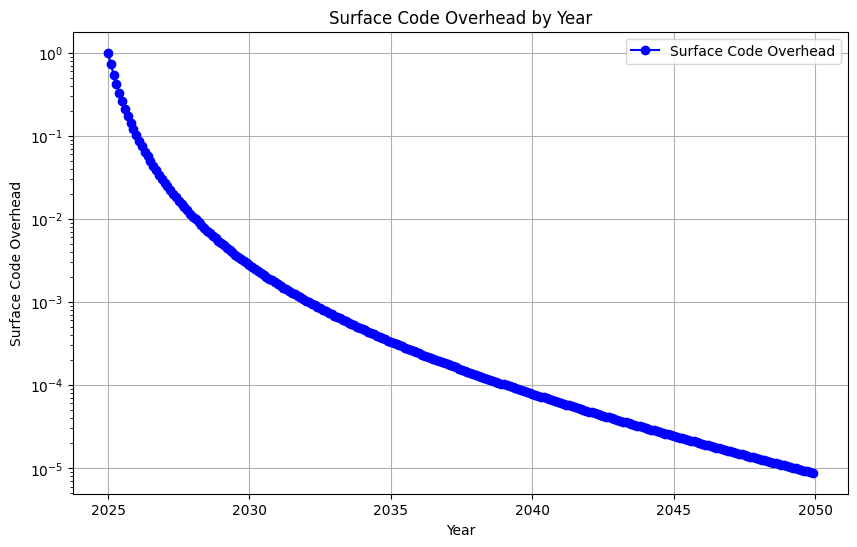

1.0
1.0


In [146]:
# graph suface code overhead over time
gate_speed_improvement_rate = 0.8
years = np.arange(2025, 2050, 0.1)
surface_code_overhead_init = surface_code_formula(initial_error*fidelity_improvement_rate**(2025-2025))
surface_code_overhead_list = [(surface_code_formula(initial_error*fidelity_improvement_rate**(year-2025))/surface_code_formula(initial_error))**1.5 for year in years]
plt.figure(figsize=(10, 6))
plt.plot(years, surface_code_overhead_list, marker='o', linestyle='-', color='b', label='Surface Code Overhead')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('Surface Code Overhead')
plt.title('Surface Code Overhead by Year')
plt.grid(True)
plt.legend()
plt.show()
print(surface_code_overhead_list[0])
print(surface_code_formula(initial_error*(fidelity_improvement_rate**(2025-2025)))/surface_code_formula(initial_error))



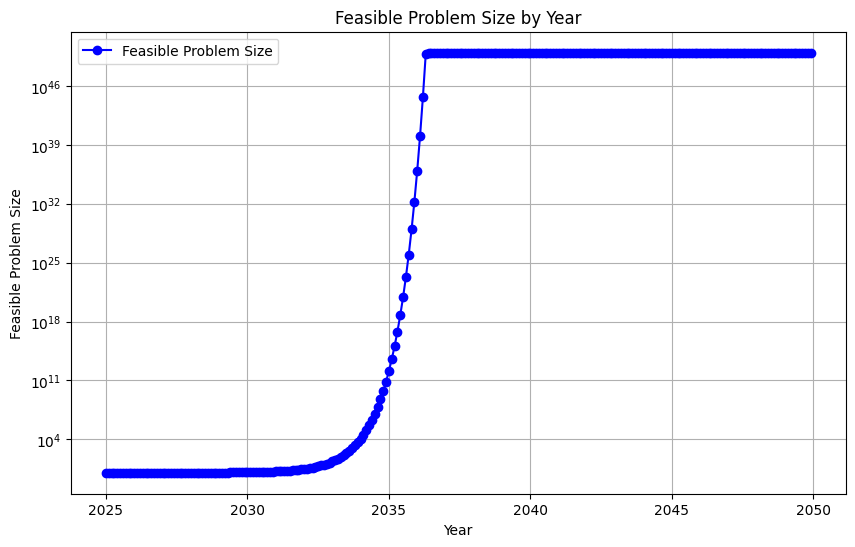

In [147]:
#graph problem_size_qubit_feasible
years = np.arange(2025, 2050, 0.1)
feasible_sizes = [problem_size_qubit_feasible(year=year) for year in years]
plt.figure(figsize=(10, 6))
plt.plot(years, feasible_sizes, marker='o', linestyle='-', color='b', label='Feasible Problem Size')
plt.xlabel('Year')
plt.ylabel('Feasible Problem Size')

plt.title('Feasible Problem Size by Year')
plt.grid(True)
plt.legend()
plt.yscale('log')

No sign change in f(x) over the interval [2.5, 1E+50] (f_low=1.2840696711098635e-21, f_high=7.33299358753455e+29); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=3.386980800672361e-21, f_high=7.076053522734171e+29); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=5.069646345252929e-21, f_high=6.82811635642423e+29); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=6.4028004534993384e-21, f_high=6.58886663690087e+29); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=7.445631489264098e-21, f_high=6.3579999655425e+29); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=8.247657109358184e-21, f_high=6.13522260952186e+29); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=8.850294710652429e-21, f_high=5.9202511280882705e+29); intersection not guarant

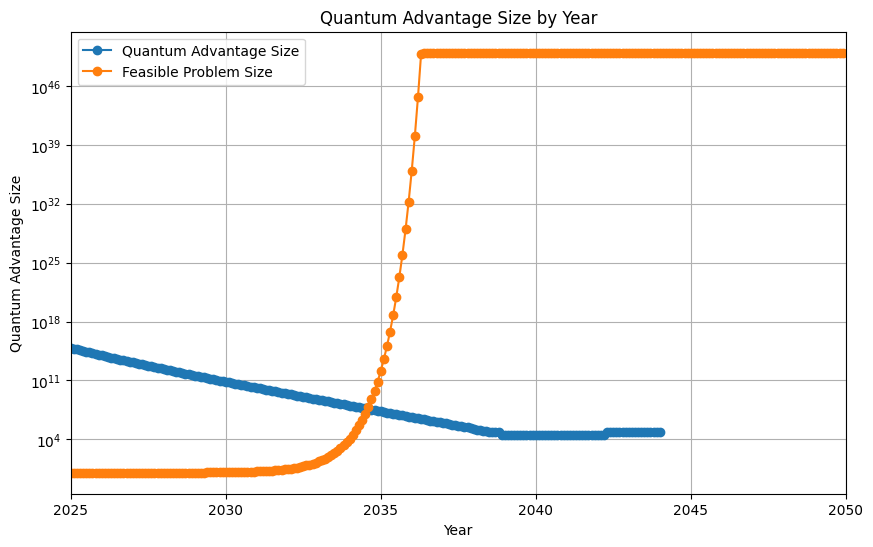

In [157]:

# Define the range of years
# years = range(2025, 2050)
years = np.arange(2025, 2050, 0.1)
classical_runtime = "n"
quantum_runtime = "log(n,2)"
# Calculate the quantum advantage size for each year
quantum_advantage_sizes = [quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime) for year in years]

# Filter out None values for plotting
filtered_years = [year for year, size in zip(years, quantum_advantage_sizes) if size is not None]
filtered_sizes = [size for size in quantum_advantage_sizes if size is not None]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_years, filtered_sizes, marker='o', linestyle='-',  label='Quantum Advantage Size')
plt.plot(years, feasible_sizes, marker='o', linestyle='-', label='Feasible Problem Size')

plt.xlabel('Year')
plt.xlim(2025, 2050)
plt.ylabel('Quantum Advantage Size')
plt.title('Quantum Advantage Size by Year')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()

# Google_roadmap = {
#     2019: 54,
#     2023: 100,
#     2025: 1000,
# }

In [158]:
classical_runtime = "n"
quantum_runtime = "n**0.5"
generalized_qea(classical_runtime, quantum_runtime)

No sign change in f(x) over the interval [2.5, 1E+50] (f_low=2.2344109093716627e-21, f_high=8.94045746442642e+28); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-2415380.16633358); intersection not guaranteed.
No sign change in f(x) over the interval [2025, 2050] (f_low=2.249999999999998e+26, f_high=inf); intersection not guaranteed.


No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-257126.4590735645); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-606467.8142919105); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-899162.6991146747); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-1144413.5971737313); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-1349925.0965420406); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-1522148.198568665); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846155, f_high=-1666484.6950951088); intersection not guaranteed.
No sign change in f(x) o

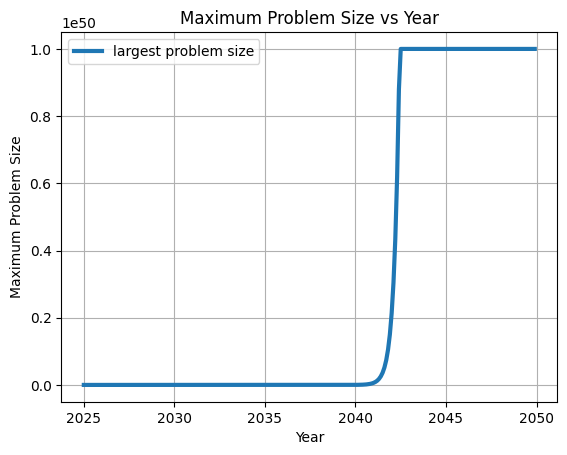

In [149]:
years = np.arange(2025, 2050, 0.1)
quantum_runtime = "n**0.5"
largest_problem_size = [find_largest_problem_size(quantum_runtime, year, quantum=True, q_prob_size="log") for year in years]
plt.plot(years, largest_problem_size, label="largest problem size", linewidth=3)
plt.xlabel("Year")
plt.ylabel("Maximum Problem Size")
plt.title("Maximum Problem Size vs Year")
plt.legend()
plt.grid(True)

# Roadmap Growth Rate Sensitivity

In [150]:
def get_intersection_year(quantum_runtime, classical_runtime,start_year=MIN_YEAR, end_year=MAX_YEAR):
    """Find intersection year for given runtime pair and roadmap"""
    def find_largest_size(year):
        return find_largest_problem_size(quantum_runtime, year, quantum=True)
    def quantum_advantage_size(year):
        return quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime)

    result = binary_search_intersection(find_largest_size, quantum_advantage_size, start_year, end_year)
    return result
    # if result is None:
    #     return 2200
    # else:
    #     return result

In [151]:
# Analyze intersection years for different classical improvement rates and algorithm types


#constants in different format
fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPU
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no 
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0
default_roadmap = percentile_90_roadmap


default_config = {
    # Improvement rates
    "fidelity_improvement_rate": 0.28,
    "gate_speed_improvement_rate": 0.14,
    "classical_speed_improvement_rate": 0.3,  # moore's law improvement
    
    # Initial values
    "classical_speed_init": 1 / (1.5 * 1e9),
    "superconducting_gate_speed_init": 1e-6,  # seconds, overhead from quantum economic advantage calculator
    "initial_error": 10 ** (-2.5),
    
    # System parameters
    "number_of_processors": 1e8,  # processor overhead done from calculations for GPU
    "connectivity_penalty_exponent": 0.0,  # connectivity penalty for physical to logical qubit ratio
    "time_upper_limit": 4 * (3.14 * 1e7) / 52,  # 1 month computation time
    
    # Algorithm overheads
    "scode_init_speed_overhead": 1e2,  # slowdown overhead from Choi, Neil, and Moses
    "alg_overhead_qubit": 1e1,  # algorithm overhead in logical qubits
    "alg_overhead_qspeed": 1e0,  # algorithm speed overhead for quantum algorithm
    "classical_alg_overhead": 1e0,
    
    # Roadmap
    "default_roadmap": percentile_90_roadmap
}
runtime_pairs = [
    ("n", "n**.5", "Grover's Algorithm"),
    ("n", "log(n,2)", "Exponential Speedup"),
    ("n**3", "n**2", "Matrix Multiplication")
]

constant_variations = [10**i for i in range(-3, 5, 1)]


# First runtime pair: n vs n^0.5
# Define runtime pairs

# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
classical_improvement_rates = np.arange(0.1, 0.9, 0.1)
intersection_results_quantum_constants = {name: [] for _, _, name in runtime_pairs}
for constant_variation in constant_variations:
    superconducting_gate_speed_init = default_config["superconducting_gate_speed_init"]*constant_variation
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=MIN_YEAR, end_year=MAX_YEAR)
        intersection_results_quantum_constants[name].append(year)


Initial intersection year for Grover's Algorithm: 2035.6460939017732
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6152524226, f_high=-2415384.598774975); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846113, f_high=-2415384.615384108); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153844367, f_high=-2415384.61536215); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.615382413, f_high=-2415384.615107841); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153840423, f_high=-2415384.615312601); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.615384301, f_high=-2415384.6153450944); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.615384193, f_high=-2415384.61

Text(0.5, 1.0, 'Intersection Year vs Quantum Constants for Different Runtime Complexities')

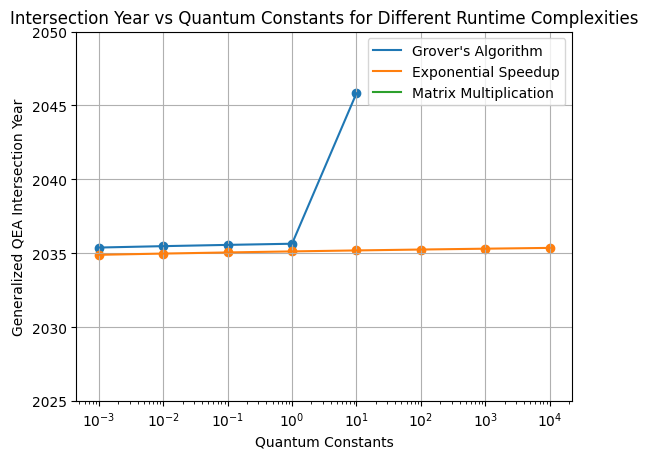

In [136]:
plt.plot(constant_variations, intersection_results_quantum_constants["Grover's Algorithm"], label="Grover's Algorithm")
plt.scatter(constant_variations, intersection_results_quantum_constants["Grover's Algorithm"])
plt.plot(constant_variations, intersection_results_quantum_constants["Exponential Speedup"], label="Exponential Speedup")
plt.scatter(constant_variations, intersection_results_quantum_constants["Exponential Speedup"])
plt.plot(constant_variations, intersection_results_quantum_constants["Matrix Multiplication"], label="Matrix Multiplication")
plt.scatter(constant_variations, intersection_results_quantum_constants["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Quantum Constants")
plt.xscale("log")
plt.ylim(2025, 2050)
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig("Figures/intersection_year_vs_classical_improvement_rate.png")
plt.title("Intersection Year vs Quantum Constants for Different Runtime Complexities")

# Classical Constant Robustness

In [32]:
# Analyze intersection years for different classical improvement rates and algorithm types

fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPU
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no 
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0
default_roadmap = percentile_90_roadmap

# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
constant_variations =[10**i for i in range(-3, 5, 1)]
intersection_results_classical_constants = {name: [] for _, _, name in runtime_pairs}

for constant_variation in constant_variations:
    classical_speed_init = default_config["classical_speed_init"]*constant_variation
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=MIN_YEAR, end_year=MAX_YEAR)
        intersection_results_classical_constants[name].append(year)


Initial intersection year for Grover's Algorithm: 2035.6460939023236
Initial intersection year for Exponential Speedup: 2035.1272777748818
Initial intersection year for Matrix Multiplication: None


Text(0.5, 1.0, 'Intersection Year vs Quantum Constants for Different Runtime Complexities')

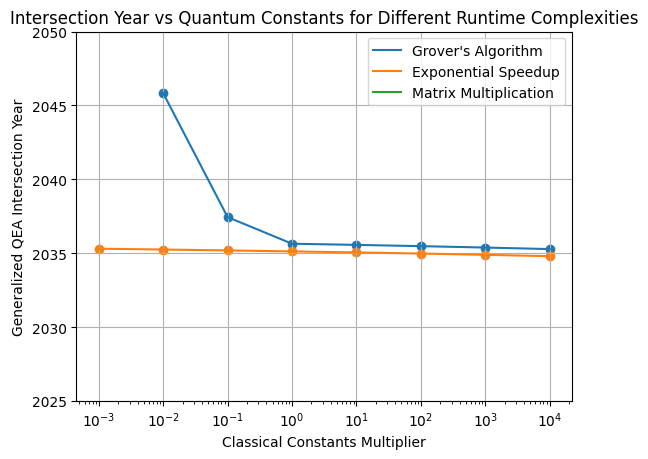

In [33]:
plt.plot(constant_variations, intersection_results_classical_constants["Grover's Algorithm"], label="Grover's Algorithm")
plt.scatter(constant_variations, intersection_results_classical_constants["Grover's Algorithm"])
plt.plot(constant_variations, intersection_results_classical_constants["Exponential Speedup"], label="Exponential Speedup")
plt.scatter(constant_variations, intersection_results_classical_constants["Exponential Speedup"])
plt.plot(constant_variations, intersection_results_classical_constants["Matrix Multiplication"], label="Matrix Multiplication")
plt.scatter(constant_variations, intersection_results_classical_constants["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.ylim(2025, 2050)
plt.xlabel("Classical Constants Multiplier")
plt.xscale("log")
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig("Figures/intersection_year_vs_classical_improvement_rate.png")
plt.title("Intersection Year vs Quantum Constants for Different Runtime Complexities")

# Sensitivity Error Reduction

In [30]:
fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPU
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no 
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0
default_roadmap = percentile_90_roadmap

# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
error_reduction_ranges = np.arange(0.1, 0.9, 0.1)
intersection_results_error_reduction = {name: [] for _, _, name in runtime_pairs}

for error_rate in error_reduction_ranges:
    fidelity_improvement_rate = error_rate
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=MIN_YEAR, end_year=MAX_YEAR)
        intersection_results_error_reduction[name].append(year)

Initial intersection year for Grover's Algorithm: 2035.6460939023236
Initial intersection year for Exponential Speedup: 2035.1272777748818
Initial intersection year for Matrix Multiplication: None


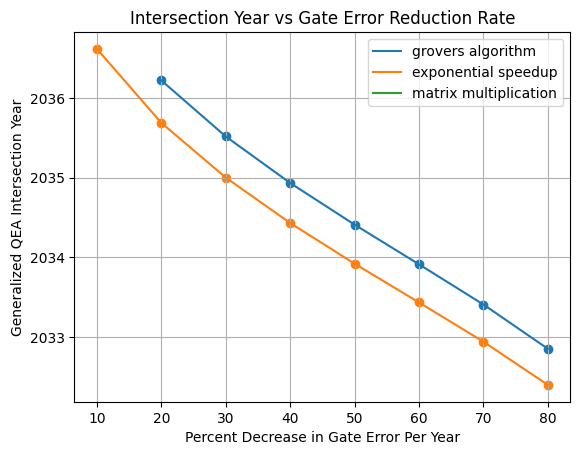

In [22]:
#now plot the intersection years vs error reduction
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"], label="grovers algorithm")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"])
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"], label="exponential speedup")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"])
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"], label="matrix multiplication")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Percent Decrease in Gate Error Per Year")
plt.title("Intersection Year vs Gate Error Reduction Rate")
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("Figures/intersection_year_vs_error_reduction_rate.png")
plt.show()


In [ ]:

fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPU
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no 
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0
default_roadmap = percentile_90_roadmap

def create_roadmap(growth_rate, init_qubits=305.13, start_year=2024, num_years=10):
    return {start_year + i: int(init_qubits * (growth_rate)**i) for i in range(num_years)}


# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to roadmap growth rate
growth_rates = np.arange(1.0, 1.9, 0.1)
intersection_results_roadmap = {name: [] for _, _, name in runtime_pairs}

for growth_rate in growth_rates:
    # Create a temporary roadmap with this growth rate
    temp_roadmap = create_roadmap(growth_rate)
    
    # Temporarily modify the global roadmap variable
    default_roadmap = temp_roadmap
    
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=MIN_YEAR, end_year=MAX_YEAR)
        intersection_results_roadmap[name].append(year)
    



/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Initial intersection year for Grover's Algorithm: 2035.6460939023236
Initial intersection year for Exponential Speedup: 2035.1272777748818
Initial intersection year for Matrix Multiplication: None


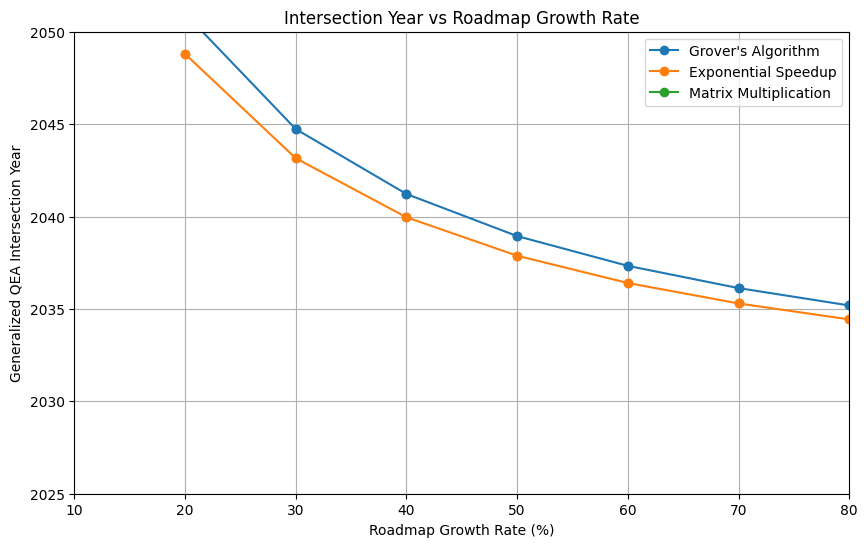

In [65]:

# Create plot
plt.figure(figsize=(10, 6))
for name in intersection_results_roadmap.keys():
    plt.plot([(rate-1)*100 for rate in growth_rates], 
             intersection_results_roadmap[name], 
             'o-', 
             label=name)
    plt.scatter([(rate-1)*100 for rate in growth_rates], 
                intersection_results_roadmap[name])

plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Roadmap Growth Rate (%)")
plt.xlim(10, 80)
plt.title("Intersection Year vs Roadmap Growth Rate")
plt.grid(True)
plt.ylim(2025, 2050)
plt.legend(loc="upper right")
plt.savefig("Figures/intersection_year_vs_roadmap_growth_rate.png")
plt.show()

# Sensitivity Gate Speed Reduction Rate

In [152]:
# find the intersection of quantum max computable problem size and quantum economic advantage use binary search intersection 

# #constants in different format
fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPUs
# time_upper_limt = 3.14*1e7 # 1-year of seconds
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no asymptotic connectivity penality
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0
default_roadmap = percentile_90_roadmap


# First runtime pair: n vs n^0.5
# Define runtime pairs
runtime_pairs = [
    ("n", "n**.5", "Grover's Algorithm"),
    ("n", "log(n,2)", "Exponential Speedup"),
    ("n**3", "n**2", "Matrix Multiplication")
]
# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
speed_improvement_ranges = np.arange(0.1, 0.9, 0.1)
intersection_results_speed_improvement = {name: [] for _, _, name in runtime_pairs}

for speed_improvement in speed_improvement_ranges:
    gate_speed_improvement_rate = speed_improvement
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=MIN_YEAR, end_year=MAX_YEAR)
        print(gate_speed_improvement_rate, year)
        intersection_results_speed_improvement[name].append(year)


Initial intersection year for Grover's Algorithm: 2035.6460939017732
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6152524226, f_high=-2415384.598774975); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153846113, f_high=-2415384.615384108); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153844367, f_high=-2415384.61536215); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.615382413, f_high=-2415384.615107841); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.6153840423, f_high=-2415384.615312601); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.615384301, f_high=-2415384.6153450944); intersection not guaranteed.
No sign change in f(x) over the interval [2.5, 1E+50] (f_low=-2415384.615384193, f_high=-2415384.61

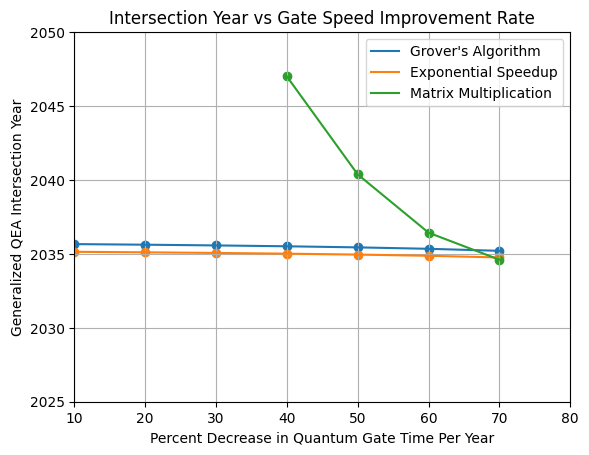

{"Grover's Algorithm": [2035.6617555336497, 2035.6207208943356, 2035.5723179148583, 2035.5137456601285, 2035.4403626441654, 2035.3437190039201, 2035.2061450809376, None], 'Exponential Speedup': [2035.1407646859868, 2035.1054772019752, 2035.0640378499622, 2035.0141611061003, 2034.9520902181243, 2034.8710553050694, 2034.7570872128442, None], 'Matrix Multiplication': [None, None, None, 2047.0010936078963, 2040.3757178299584, 2036.4333453308677, 2034.6058779262107, None]}


In [155]:

plt.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"], label="Grover's Algorithm")
plt.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"])
plt.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"], label="Exponential Speedup")
plt.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"])
plt.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"], label="Matrix Multiplication")
plt.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Percent Decrease in Quantum Gate Time Per Year")
plt.title("Intersection Year vs Gate Speed Improvement Rate")
plt.grid(True)
plt.ylim(2025, 2050)
plt.legend(loc="upper right")
plt.xlim(10, 80)
plt.savefig("Figures/intersection_year_vs_gate_speed_improvement_rate.png")
plt.show()

print(intersection_results_speed_improvement)



# Classical Improvement Rate Sensitivity 

In [ ]:
# First runtime pair: n vs n^0.5

# #constants in different format
fidelity_improvement_rate = 0.28
gate_speed_improvement_rate = 0.14
classical_speed_init = 1 / (1.5 * 1e9)  #
superconducting_gate_speed_init = 1e-6  # (1/(1.5*1e9))*(10**3.78) # seconds #overhead taken from quantum economic advantage calculator
initial_error = 10 ** (-2.5)
classical_speed_improvement_rate = 0.3  # moore's law improvement
number_of_processors = 1e8  # processor overehead done from calculations for GPUs
# time_upper_limt = 3.14*1e7 # 1-year of seconds
connectivity_penalty_exponent = 0.0  # connectivity penalty for physical to logical qubit ratio in this range. default no asymptotic connectivity penality
time_upper_limit = 4 * (3.14 * 1e7) / 52  # 1 month computation time
scode_init_speed_overhead = 1e2  # slowdown overhead from Choi, Neil, and Moses
alg_overhead_qubit = 1e1  # algorithm overhead in logical qubits
alg_overhead_qspeed = 1e0  # algorithm speed overhead based on constants this is exclusivly for quantum algorithm
classical_alg_overhead = 1e0
default_roadmap = percentile_90_roadmap


# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
classical_improvement_rates = np.arange(0.1, 0.9, 0.1)
intersection_results_classical_improvement_rate = {name: [] for _, _, name in runtime_pairs}

for classical_improvement_rate in classical_improvement_rates:
    classical_speed_improvement_rate = classical_improvement_rate
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=MIN_YEAR, end_year=MAX_YEAR)
        intersection_results_classical_improvement_rate[name].append(year)

Initial intersection year for Grover's Algorithm: 2035.6460939023236
Initial intersection year for Exponential Speedup: 2035.1272777748818
Initial intersection year for Matrix Multiplication: None


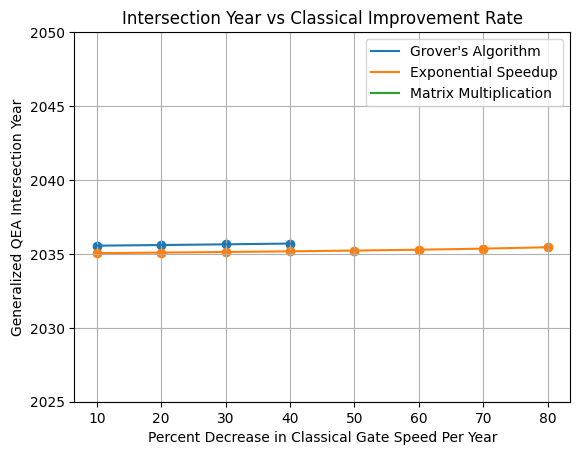

In [25]:
plt.plot(classical_improvement_rates*100, intersection_results_classical_improvement_rate["Grover's Algorithm"], label="Grover's Algorithm")
plt.scatter(classical_improvement_rates*100, intersection_results_classical_improvement_rate["Grover's Algorithm"])
plt.plot(classical_improvement_rates*100, intersection_results_classical_improvement_rate["Exponential Speedup"], label="Exponential Speedup")
plt.scatter(classical_improvement_rates*100, intersection_results_classical_improvement_rate["Exponential Speedup"])
plt.plot(classical_improvement_rates*100, intersection_results_classical_improvement_rate["Matrix Multiplication"], label="Matrix Multiplication")
plt.scatter(classical_improvement_rates*100, intersection_results_classical_improvement_rate["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Percent Decrease in Classical Gate Speed Per Year")
plt.title("Intersection Year vs Classical Improvement Rate")
plt.grid(True)
plt.ylim(2025, 2050)
plt.legend(loc="upper right")
plt.savefig("Figures/intersection_year_vs_classical_improvement_rate.png")
plt.show()



In [26]:


# runtime_pairs = [
#     ("n", "n**.5", "Grover's Algorithm"),
#     ("n", "log(n,2)", "Exponential Speedup"),
#     ("n**3", "n**2", "Matrix Multiplication")
# ]

# # Modified get_intersection_year to accept roadmap parameter
# def get_intersection_year(quantum_runtime, classical_runtime, roadmap=default_roadmap, start_year=MIN_YEAR, end_year=MAX_YEAR):
#     """Find intersection year for given runtime pair and roadmap"""
#     def find_largest_size(year):
#         return find_largest_problem_size(quantum_runtime, year, quantum=True, roadmap=roadmap)
#     def quantum_advantage_size(year):
#         return quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime)
    
    
#     return binary_search_intersection(find_largest_size, quantum_advantage_size, start_year, end_year)


# def create_roadmap(growth_rate, init_qubits=100, start_year=2024, num_years=10):
#     return {start_year + i: int(init_qubits * (growth_rate)**i) for i in range(num_years)}


# # Create a range of growth rates from 1.1 to 1.8
# growth_rates = np.arange(1.1, 1.9, 0.1)

# # Dictionary to store results for each algorithm
# intersection_results = {name: [] for _, _, name in runtime_pairs}

# # Calculate intersection years for each growth rate
# for growth_rate in growth_rates:
#     roadmap = create_roadmap(growth_rate)
    
#     for classical_rt, quantum_rt, name in runtime_pairs:
#         year = get_intersection_year(quantum_rt, classical_rt, roadmap)
#         intersection_results[name].append(year)

# # Create the plot
# plt.figure(figsize=(12, 8))

# # Plot lines for each algorithm
# for name in intersection_results.keys():
#     plt.plot(growth_rates, intersection_results[name], 'o-', label=name, linewidth=2, markersize=8)

# plt.xlabel('Qubit Growth Rate (per year)', fontsize=12, fontweight='bold')
# plt.ylabel('Intersection Year', fontsize=12, fontweight='bold')
# plt.title('Quantum Advantage Intersection Year vs Qubit Growth Rate', fontsize=14, fontweight='bold')
# plt.grid(True, alpha=0.3)
# plt.legend(fontsize=10)

# # Format x-axis to show percentages
# plt.xticks(growth_rates, [f'{(rate-1)*100:.0f}%' for rate in growth_rates])

# # Add horizontal line at 2050 to show upper limit
# plt.axhline(y=2050, color='r', linestyle='--', alpha=0.3, label='Year 2050')

# # Adjust layout to prevent label cutoff
# plt.tight_layout()

# # Save the figure
# plt.savefig("Figures/intersection_year_vs_growth_rate.png", dpi=300, bbox_inches='tight')
# plt.show()

# # Print numerical results
# print("\nNumerical Results:")
# print("-" * 80)
# print(f"{'Growth Rate':<12}", end="")
# for name in intersection_results.keys():
#     print(f"{name:<22}", end="")
# print("\n" + "-" * 80)

# for i, rate in enumerate(growth_rates):
#     print(f"{(rate-1)*100:>3.0f}%{'':8}", end="")
#     for name in intersection_results.keys():
#         year = intersection_results[name][i]
#         year_str = f"{year:.1f}" if year is not None else "N/A"
#         print(f"{year_str:<22}", end="")
#     print()